This is the notebook file containing the code for training the plant identification model using YOLOv11. Explanations for different code snippets will be above the code.


This checks if the runtime being used is GPU

In [ ]:
!nvidia-smi


Mon Apr 21 14:44:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


Installs Ultralytics from their documentation which contains YOLO

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

Installs Roboflow and imports the annotated dataset through API

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="insertAPIKeyHere")
project = rf.workspace("mattflo").project("plantdetection-qey7i")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import torch
torch.cuda.empty_cache()


The training code which shows that there are 100 epochs and a batch size of 8. Other values are set to default

In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=100 imgsz=1088 batch=8

Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/PlantDetection-1/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=1088, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

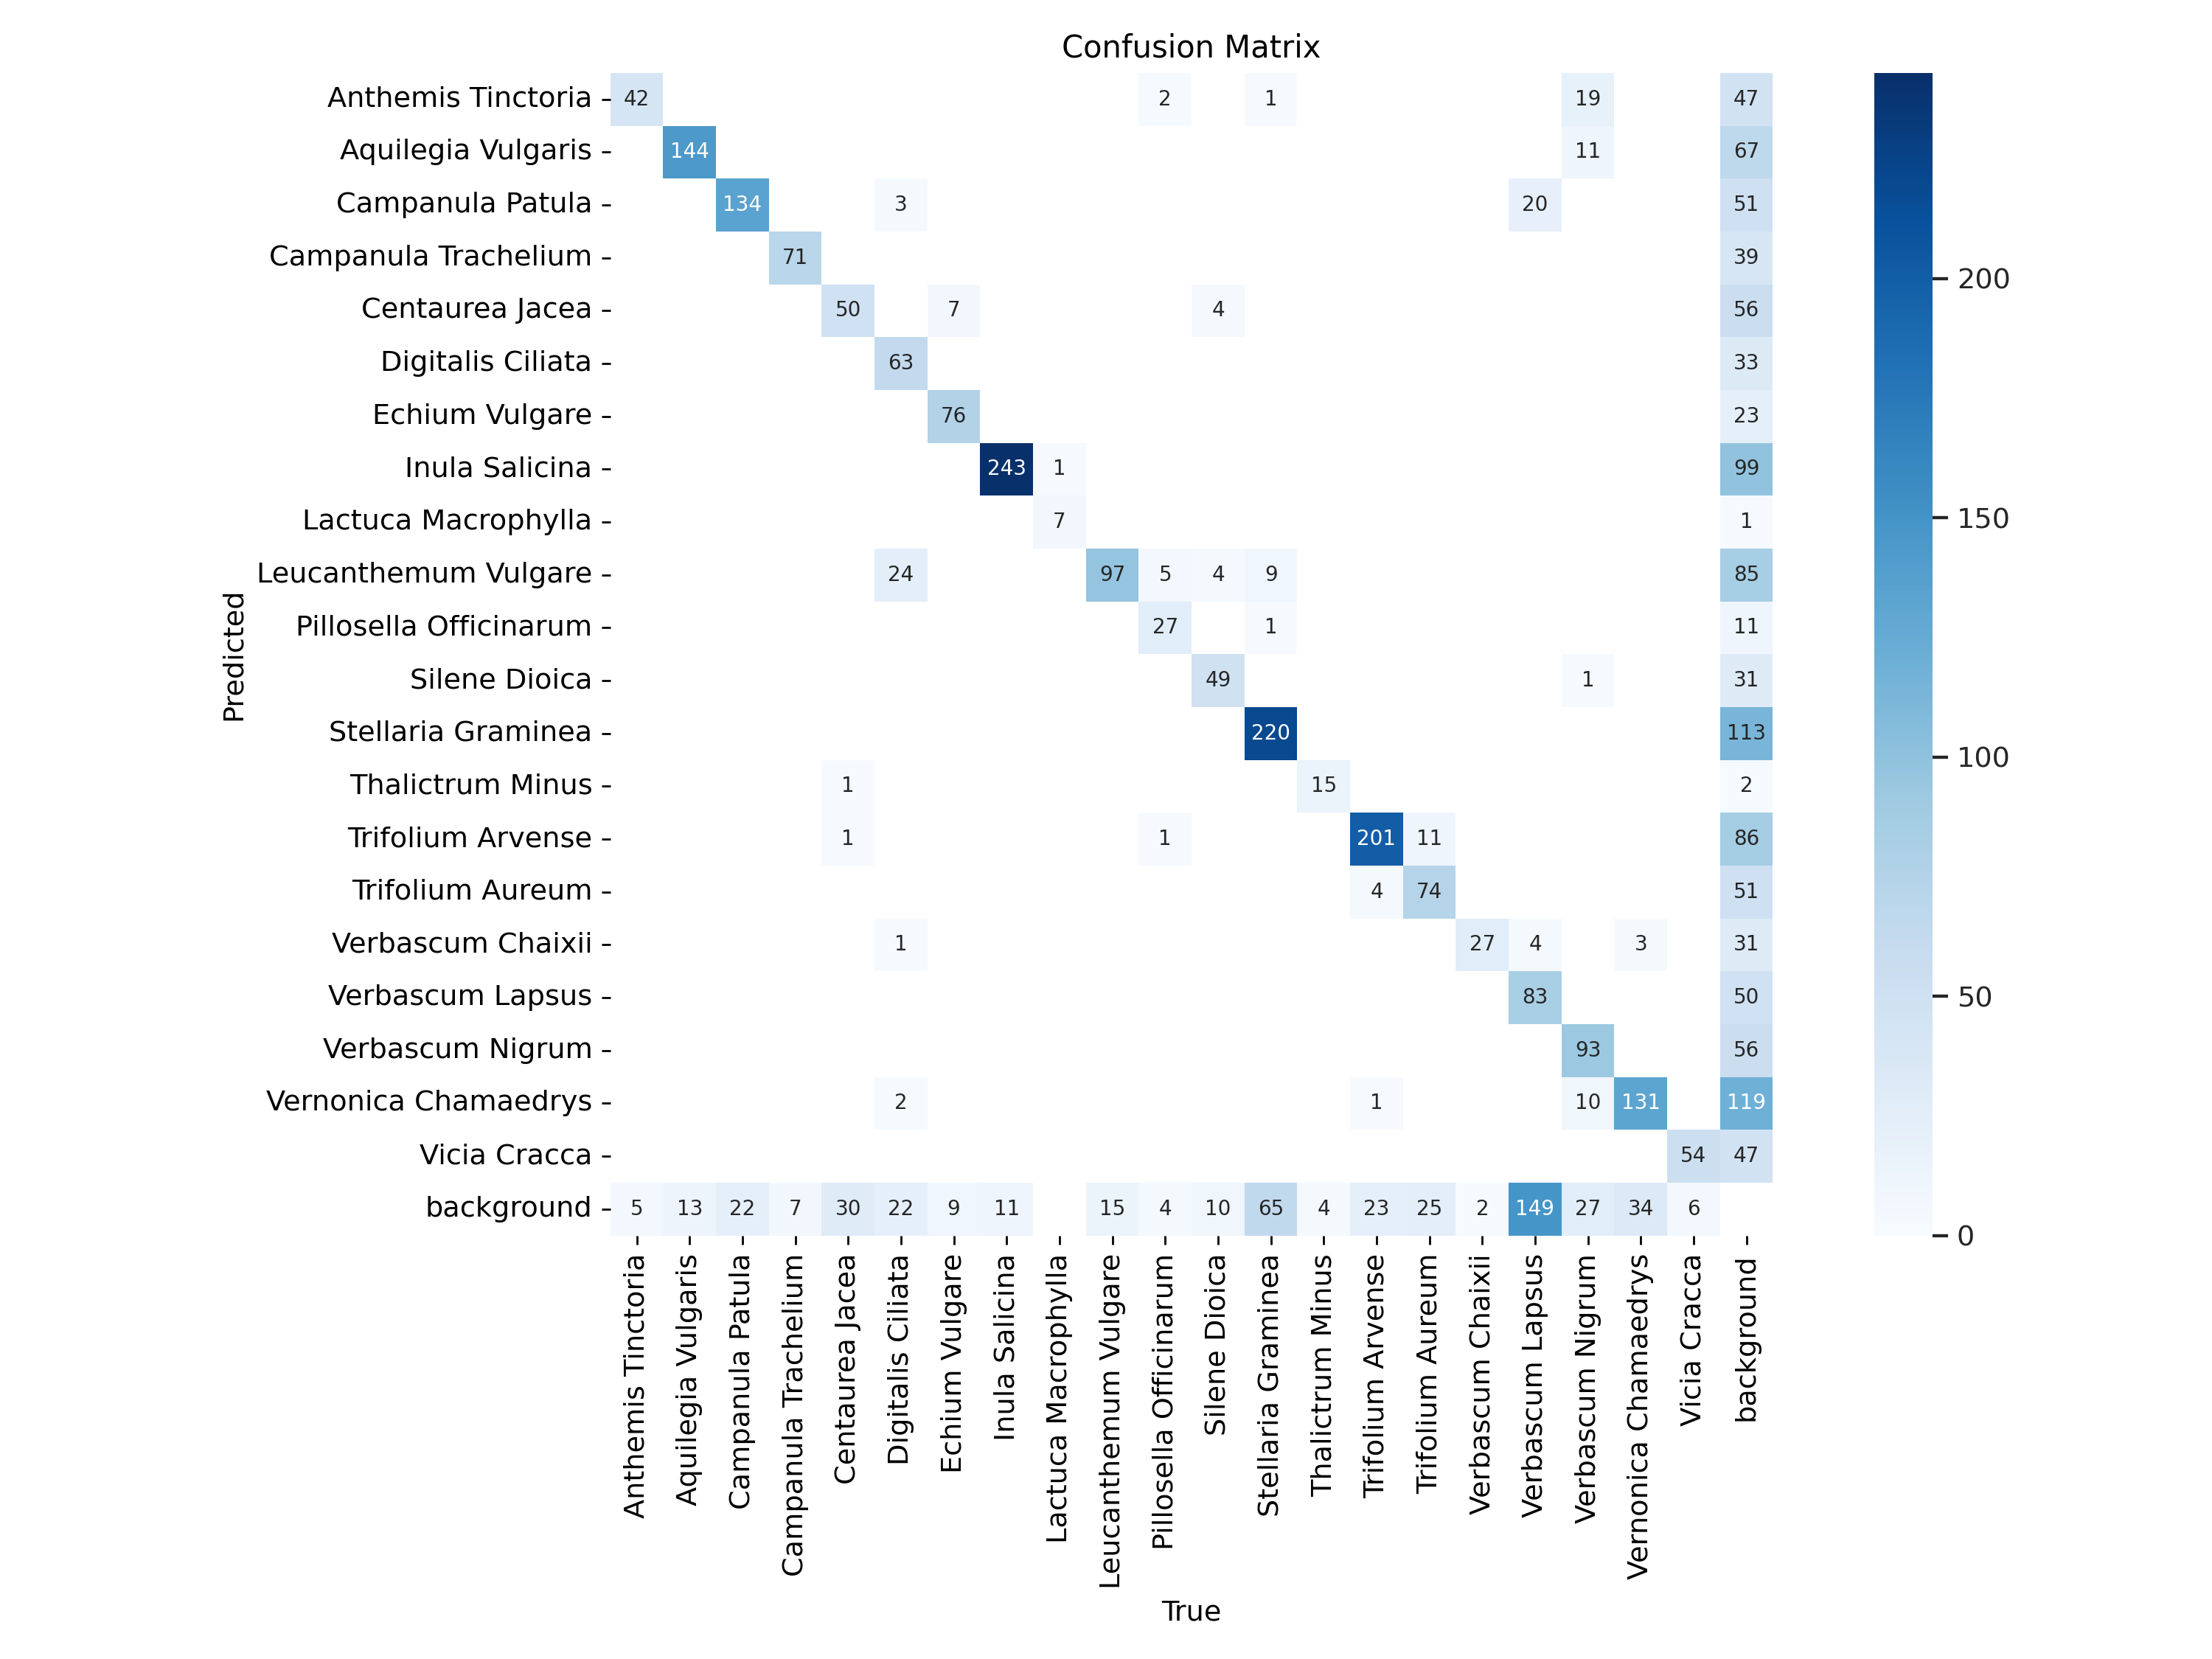

In [ ]:
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=1080)

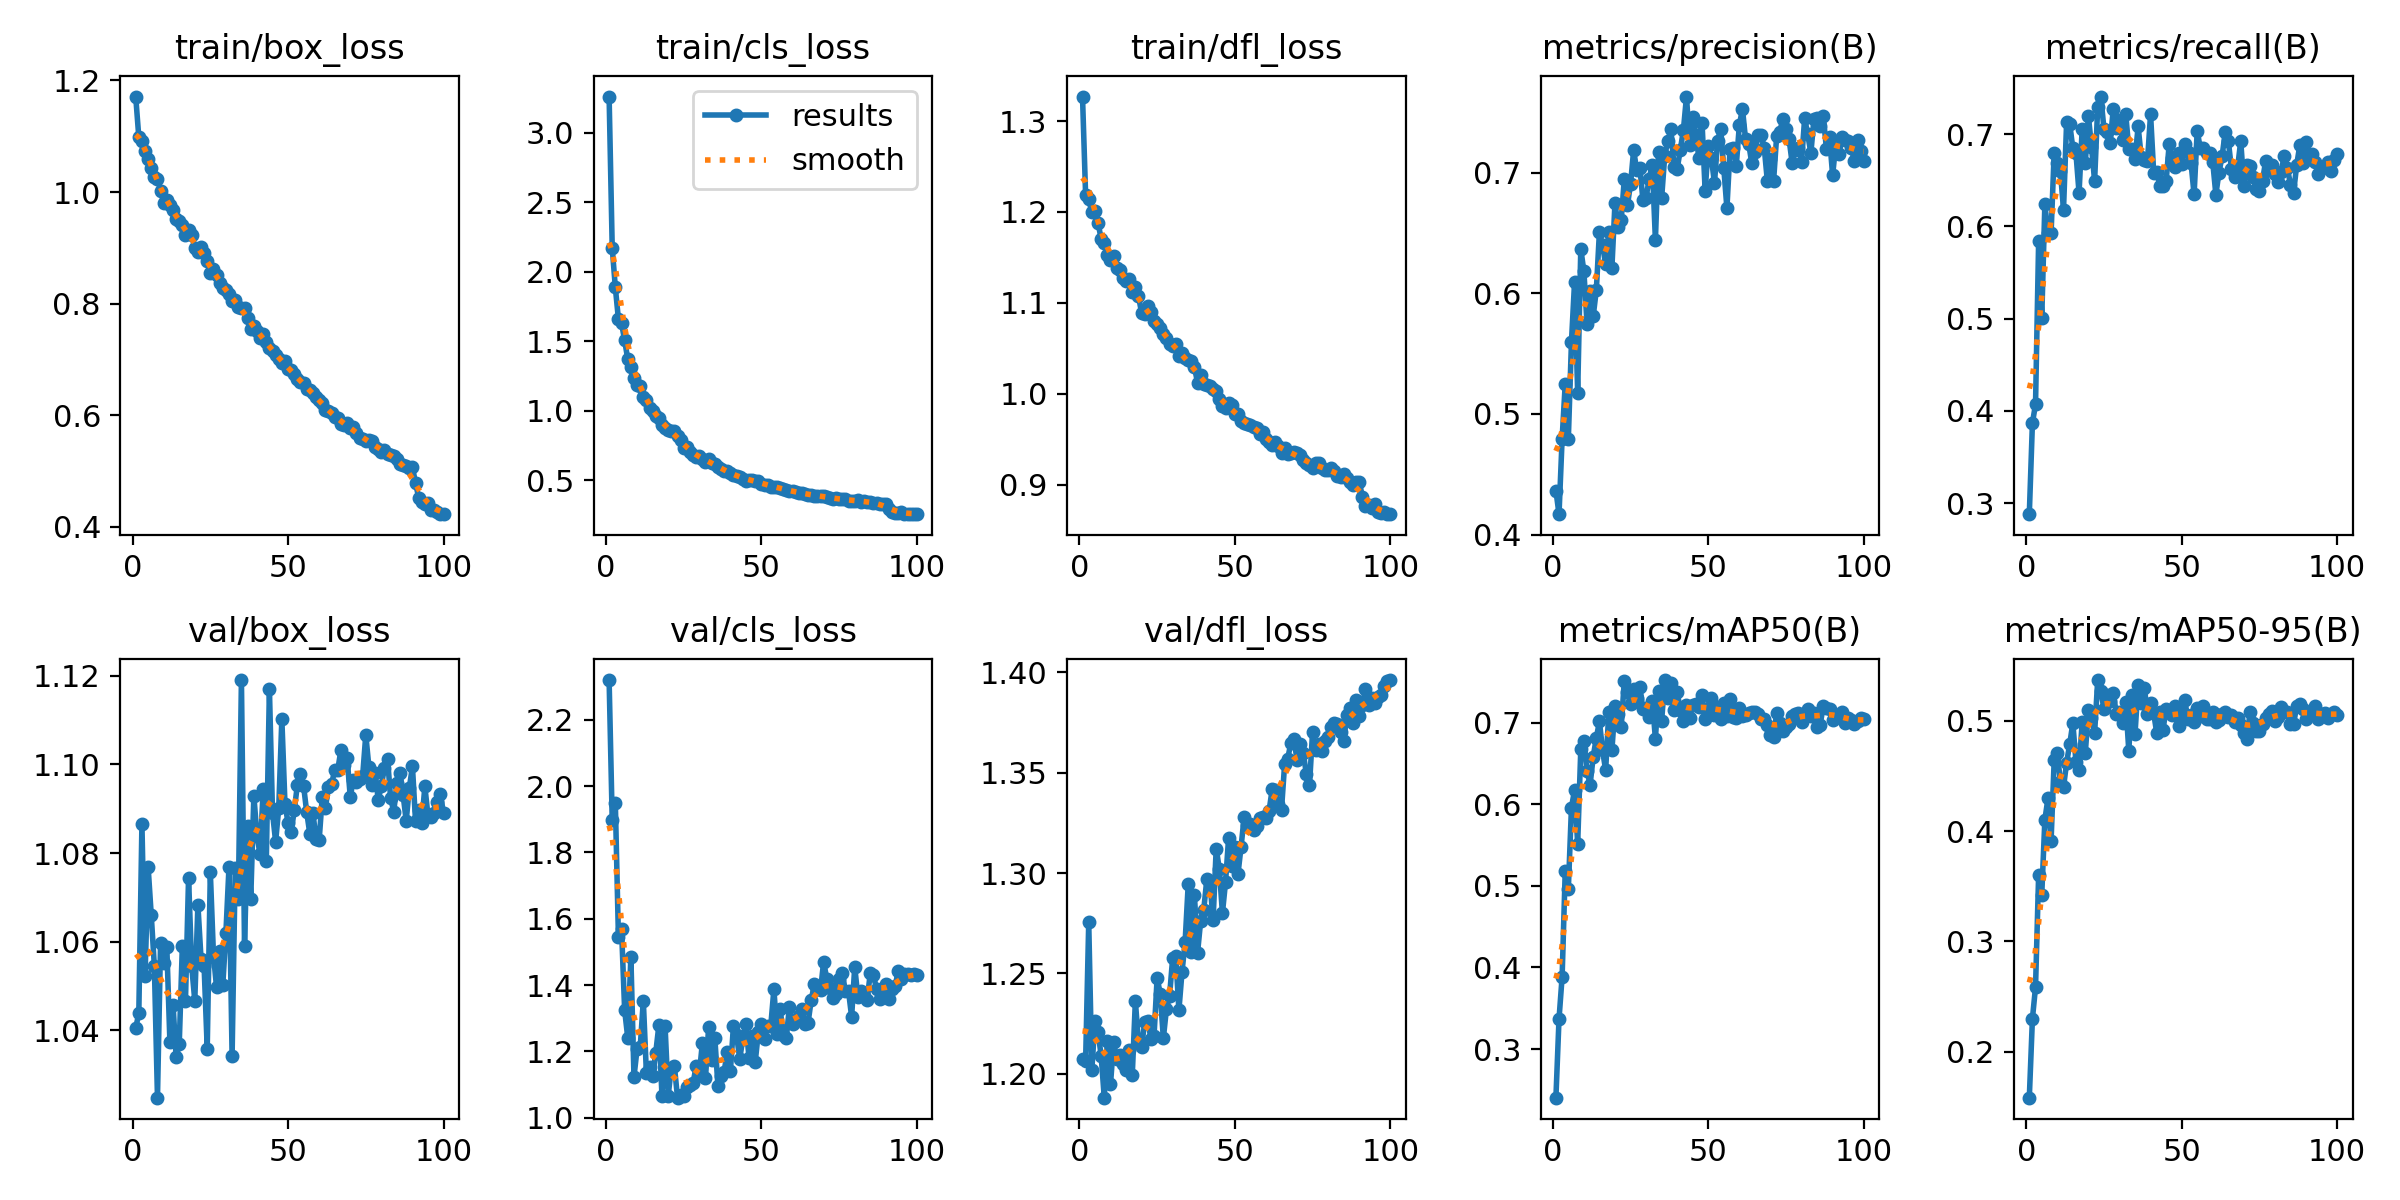

In [ ]:
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=1080)

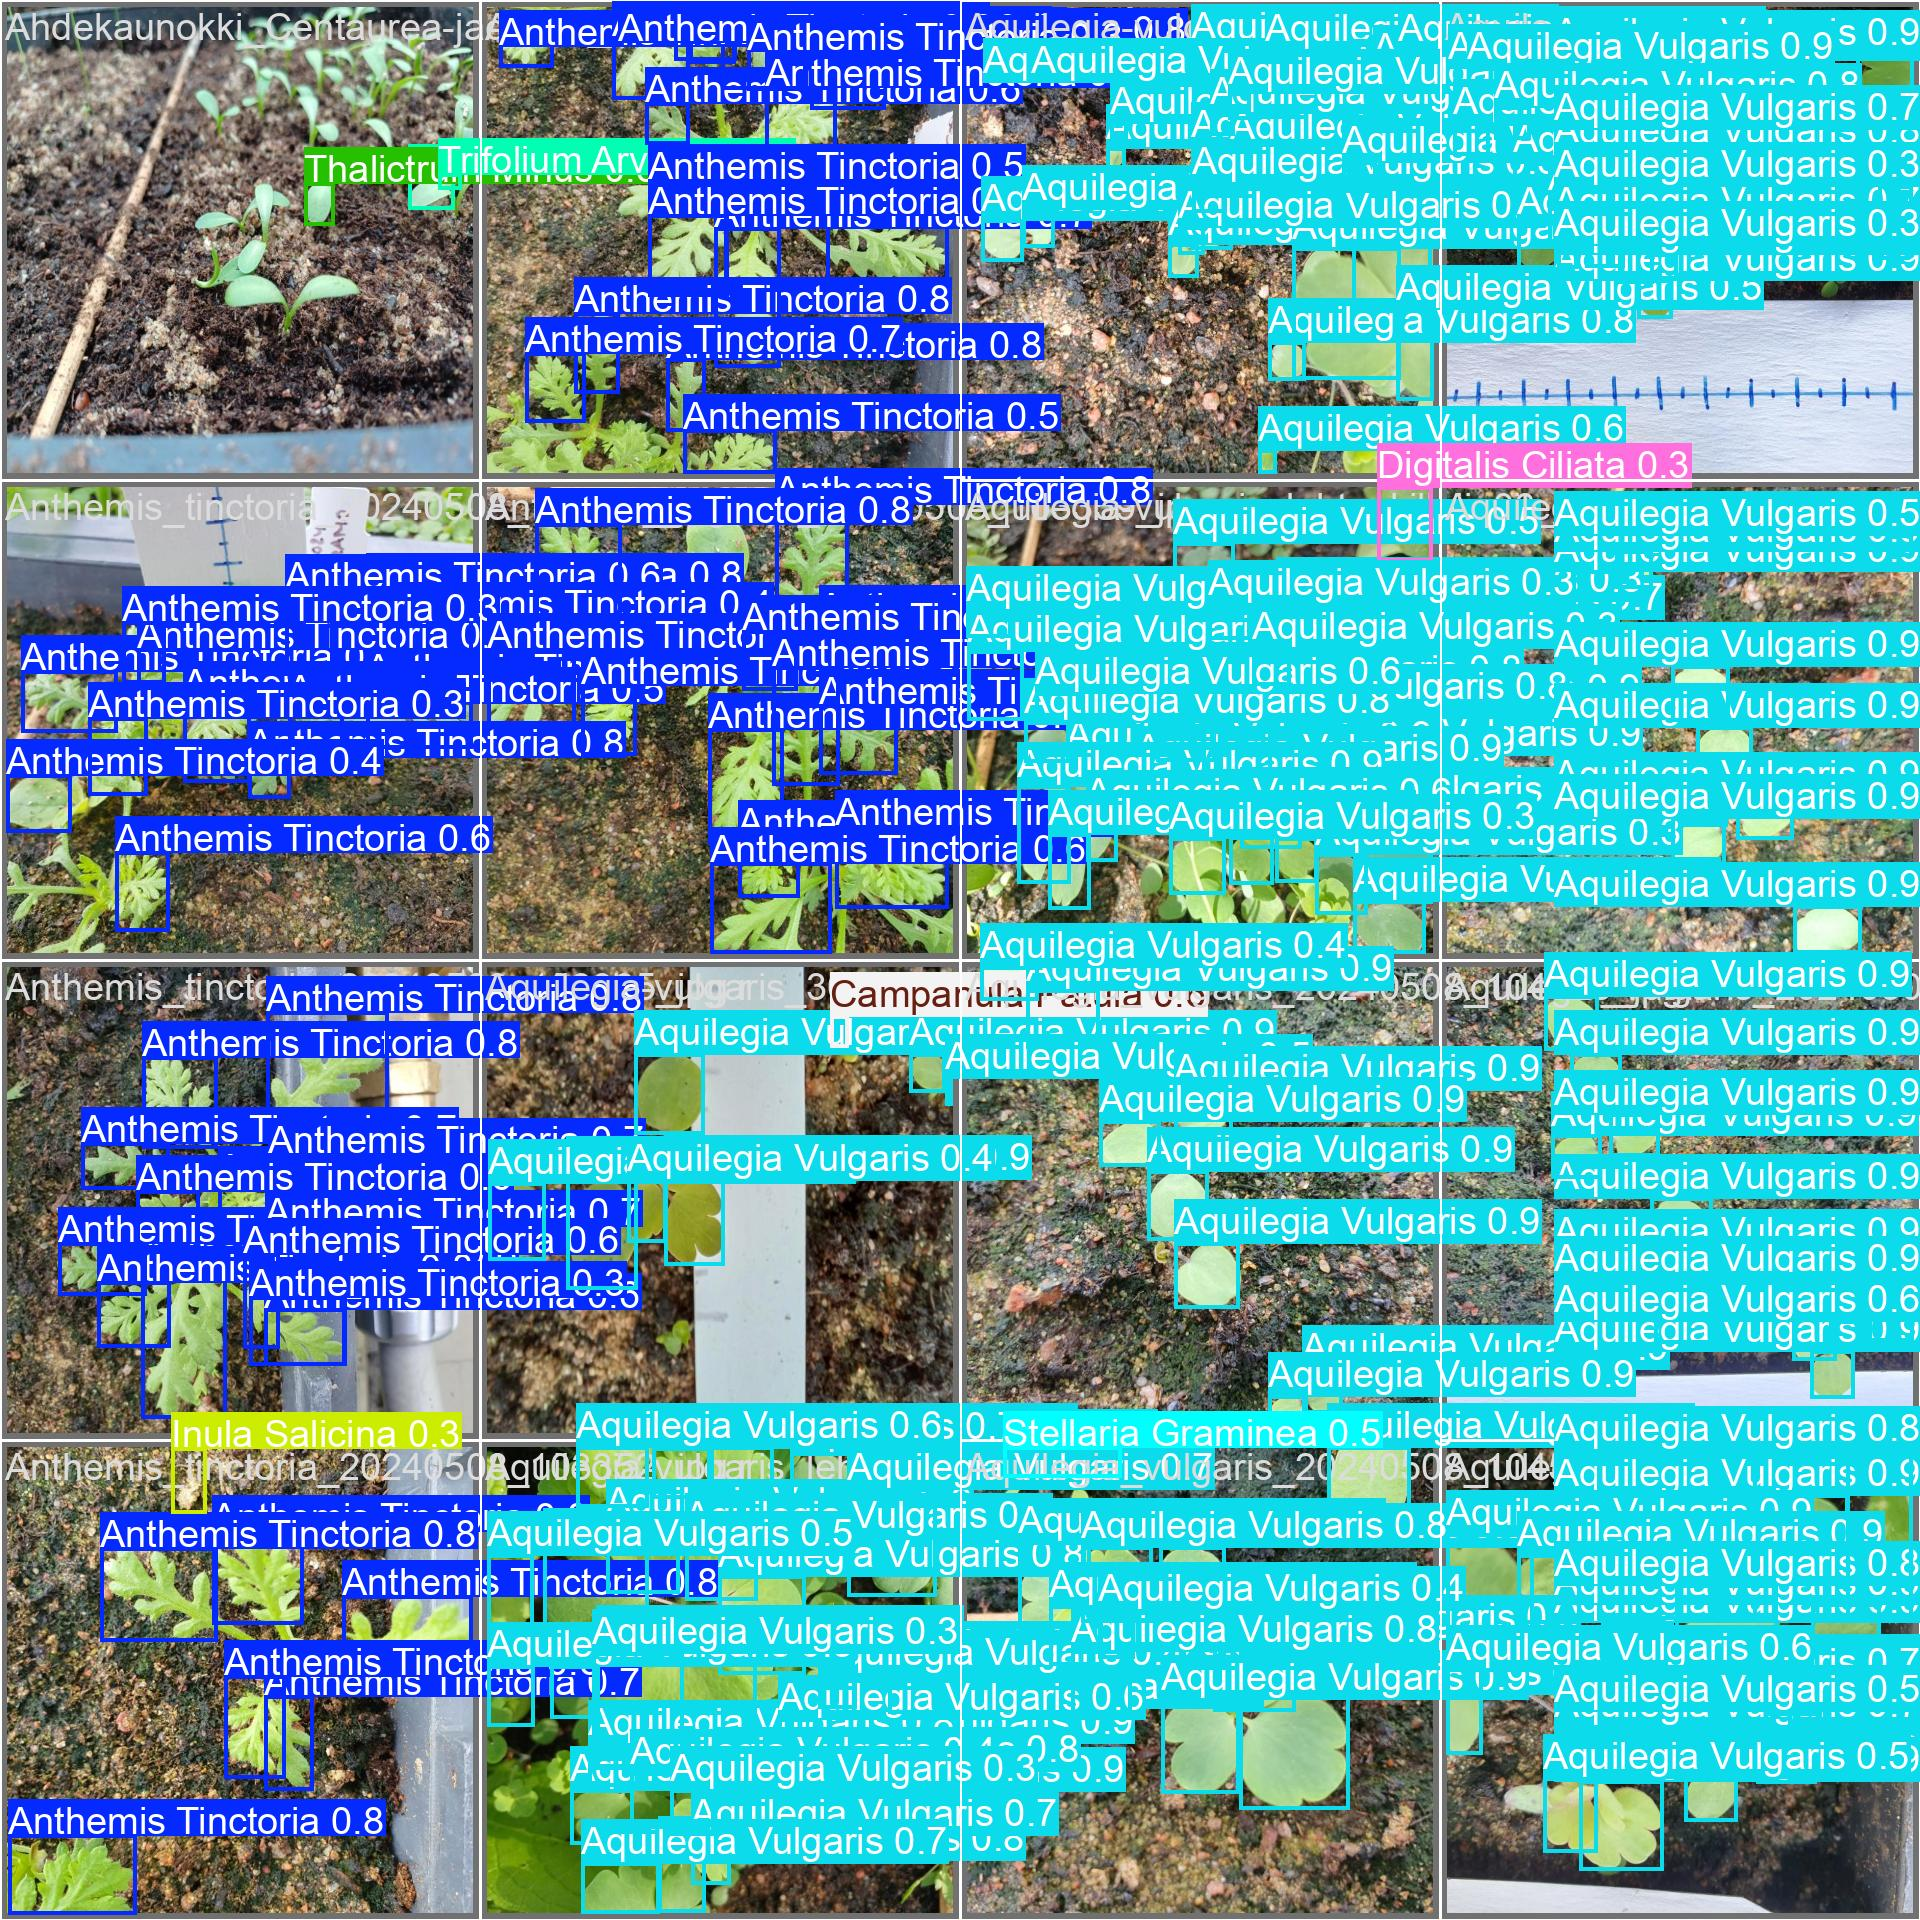

In [ ]:
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=1080)

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/21.04.2025/runs/detect/train3/weights/best.pt conf=0.25 source=/content/Digitalis_ciliata_maatiaissormustinkukka06.jpg

Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,420,927 parameters, 0 gradients, 21.3 GFLOPs

image 1/1 /content/Digitalis_ciliata_maatiaissormustinkukka06.jpg: 1088x1088 32 Digitalis Ciliatas, 37.4ms
Speed: 11.3ms preprocess, 37.4ms inference, 209.1ms postprocess per image at shape (1, 3, 1088, 1088)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict
